In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import nltk.classify.util
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.classify import NaiveBayesClassifier
import numpy as np
import re
import string
import nltk
%matplotlib inline

In [ ]:
temp = pd.read_csv("/content/1429_1.csv")
temp.head()

<ipython-input-15-c35675b95f2a>:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv("/content/1429_1.csv")


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [ ]:
permanent = temp[['reviews.rating' , 'reviews.text' , 'reviews.title' , 'reviews.username']]
print(permanent.isnull().sum()) #Checking for null values
permanent.head()

reviews.rating      33
reviews.text         1
reviews.title        5
reviews.username     2
dtype: int64


,reviews.rating,reviews.text,reviews.title,reviews.username
0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter
1,5.0,great for beginner or experienced person. Boug...,very fast,truman
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42


In [ ]:
check =  permanent[permanent["reviews.rating"].isnull()]
check.head()

,reviews.rating,reviews.text,reviews.title,reviews.username
2886,NaN,The Kindle is my first e-ink reader. I own an ...,"Worth the money. Not perfect, but very very go...",Jeffrey Stanley
2887,NaN,"I'm a first-time Kindle owner, so I have nothi...","I Wanted a Dedicated E-Reader, and That's What...",Matthew Coenen
2888,NaN,UPDATE NOVEMBER 2011:My review is now over a y...,Kindle vs. Nook (updated),Ron Cronovich
2889,NaN,"I'm a first-time Kindle owner, so I have nothi...","I Wanted a Dedicated E-Reader, and That's What...",Matthew Coenen
2890,NaN,I woke up to a nice surprise this morning: a n...,"Not the perfect do-it-all device, but very clo...",C. Tipton


In [ ]:
senti= permanent[permanent["reviews.rating"].notnull()]
permanent.head()

,reviews.rating,reviews.text,reviews.title,reviews.username
0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter
1,5.0,great for beginner or experienced person. Boug...,very fast,truman
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42


In [ ]:
senti["senti"] = senti["reviews.rating"]>=4
senti["senti"] = senti["senti"].replace([True , False] , ["pos" , "neg"])

<ipython-input-18-c2de5928bd98>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  senti["senti"] = senti["reviews.rating"]>=4
<ipython-input-18-c2de5928bd98>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  senti["senti"] = senti["senti"].replace([True , False] , ["pos" , "neg"])


<Axes: >

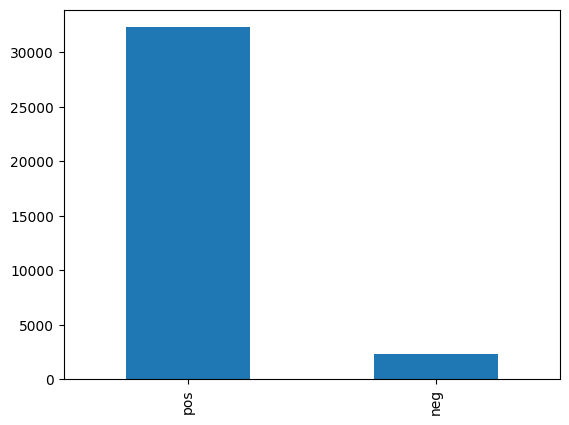

In [ ]:
senti["senti"].value_counts().plot.bar()

In [ ]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
import numpy as np
import re
import string
import nltk
import pandas as pd
check = pd.read_csv('/content/1429_1.csv')

cleanup_re = re.compile('[^a-z]+')
def cleanup(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = cleanup_re.sub(' ', sentence).strip()
    #sentence = " ".join(nltk.word_tokenize(sentence))
    return sentence

senti["Summary_Clean"] = senti["reviews.text"].apply(cleanup)
check["Summary_Clean"] = check["reviews.text"].apply(cleanup)

<ipython-input-22-cff9bffd215c>:8: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  check = pd.read_csv('/content/1429_1.csv')
<ipython-input-22-cff9bffd215c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  senti["Summary_Clean"] = senti["reviews.text"].apply(cleanup)


In [ ]:
split = senti[["Summary_Clean" , "senti"]]
train=split.sample(frac=0.8,random_state=200)
test=split.drop(train.index)

In [ ]:
def word_feats(words):
    features = {}
    for word in words:
        features [word] = True
    return features

In [ ]:
train["words"] = train["Summary_Clean"].str.lower().str.split()
test["words"] = test["Summary_Clean"].str.lower().str.split()
check["words"] = check["Summary_Clean"].str.lower().str.split()

train.index = range(train.shape[0])
test.index = range(test.shape[0])
check.index = range(check.shape[0])
prediction =  {} ## For storing results of different classifiers

train_naive = []
test_naive = []
check_naive = []

for i in range(train.shape[0]):
    train_naive = train_naive +[[word_feats(train["words"][i]) , train["senti"][i]]]
for i in range(test.shape[0]):
    test_naive = test_naive +[[word_feats(test["words"][i]) , test["senti"][i]]]
for i in range(check.shape[0]):
    check_naive = check_naive +[word_feats(check["words"][i])]


classifier = NaiveBayesClassifier.train(train_naive)
print("NLTK Naive bayes Accuracy : {}".format(nltk.classify.util.accuracy(classifier , test_naive)))
classifier.show_most_informative_features(5)

NLTK Naive bayes Accuracy : 0.5897472924187726
Most Informative Features
                 deleted = True              neg : pos    =     51.3 : 1.0
                 warning = True              neg : pos    =     51.3 : 1.0
                    bent = True              neg : pos    =     42.0 : 1.0
                    nope = True              neg : pos    =     42.0 : 1.0
                  rotate = True              neg : pos    =     42.0 : 1.0


In [ ]:
y =[]
only_words= [test_naive[i][0] for i in range(test.shape[0])]
for i in range(test.shape[0]):
    y = y + [classifier.classify(only_words[i] )]
prediction["Naive"]= np.asarray(y)

y1 = []
for i in range(check.shape[0]):
    y1 = y1 + [classifier.classify(check_naive[i] )]

check["Naive"] = y1


In [ ]:
from wordcloud import STOPWORDS
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

stopwords = list(STOPWORDS)
stopwords.remove("not")

count_vect = CountVectorizer(min_df=2, stop_words=stopwords, ngram_range=(1, 2))
tfidf_transformer = TfidfTransformer()

X_train_counts = count_vect.fit_transform(train["Summary_Clean"])
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

X_new_counts = count_vect.transform(test["Summary_Clean"])
X_test_tfidf = tfidf_transformer.transform(X_new_counts)

checkcounts = count_vect.transform(check["Summary_Clean"])
checktfidf = tfidf_transformer.transform(checkcounts)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


In [ ]:
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB().fit(X_train_tfidf , train["senti"])
prediction['Multinomial'] = model1.predict_proba(X_test_tfidf)[:,1]
print("Multinomial Accuracy : {}".format(model1.score(X_test_tfidf , test["senti"])))

check["multi"] = model1.predict(checktfidf)## Predicting Sentiment for Check which was Null values for rating

Multinomial Accuracy : 0.9329963898916968


In [ ]:
from sklearn.naive_bayes import BernoulliNB
model2 = BernoulliNB().fit(X_train_tfidf,train["senti"])
prediction['Bernoulli'] = model2.predict_proba(X_test_tfidf)[:,1]
print("Bernoulli Accuracy : {}".format(model2.score(X_test_tfidf , test["senti"])))

check["Bill"] = model2.predict(checktfidf)## Predicting Sentiment for Check which was Null values for rating

Bernoulli Accuracy : 0.9204332129963899


In [ ]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(solver='lbfgs' , C=1000)
logistic = logreg.fit(X_train_tfidf, train["senti"])
prediction['LogisticRegression'] = logreg.predict_proba(X_test_tfidf)[:,1]
print("Logistic Regression Accuracy : {}".format(logreg.score(X_test_tfidf , test["senti"])))

check["log"] = logreg.predict(checktfidf)## Predicting Sentiment for Check which was Null values for rating

Logistic Regression Accuracy : 0.9371841155234657


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
words = count_vect.get_feature_names_out()
feature_coefs = pd.DataFrame(
    data = list(zip(words, logistic.coef_[0])),
    columns = ['feature', 'coef'])
feature_coefs.sort_values(by="coef")

,feature,coef
42481,terrible,-20.652000
48056,will definitely,-19.992456
10647,done great,-19.342617
38807,slow,-18.991615
18450,great year,-18.592033
...,...,...
32876,probably wouldn,15.856910
28400,not disappointed,16.483656
30972,perfect,17.796870
17859,great,18.306579


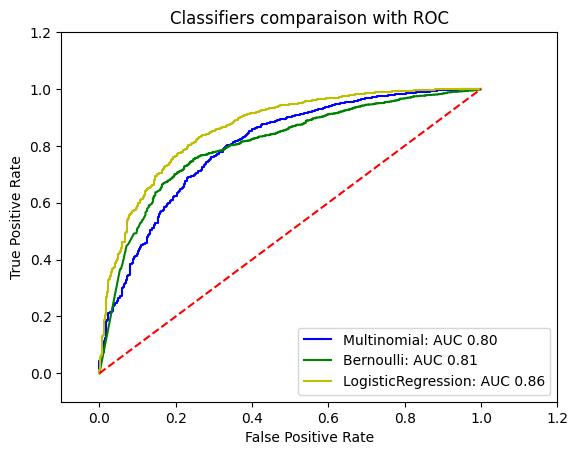

In [ ]:
def formatt(x):
    if x == 'neg':
        return 0
    if x == 0:
        return 0
    return 1
vfunc = np.vectorize(formatt)

cmp = 0
colors = ['b', 'g', 'y', 'm', 'k']
for model, predicted in prediction.items():
    if model not in 'Naive':
        false_positive_rate, true_positive_rate, thresholds = roc_curve(test["senti"].map(vfunc), predicted)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
        cmp += 1

plt.title('Classifiers comparaison with ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
test.senti = test.senti.replace(["pos" , "neg"] , [True , False] )


In [ ]:
keys = prediction.keys()
for key in ['Multinomial', 'Bernoulli', 'LogisticRegression']:
    print(" {}:".format(key))
    print(metrics.classification_report(test["senti"], prediction.get(key)>.5, target_names = ["positive", "negative"]))
    print("\n")

 Multinomial:
              precision    recall  f1-score   support

    positive       0.00      0.00      0.00       464
    negative       0.93      1.00      0.97      6461

    accuracy                           0.93      6925
   macro avg       0.47      0.50      0.48      6925
weighted avg       0.87      0.93      0.90      6925



 Bernoulli:
              precision    recall  f1-score   support

    positive       0.33      0.17      0.23       464
    negative       0.94      0.97      0.96      6461

    accuracy                           0.92      6925
   macro avg       0.63      0.57      0.59      6925
weighted avg       0.90      0.92      0.91      6925



 LogisticRegression:
              precision    recall  f1-score   support

    positive       0.55      0.33      0.41       464
    negative       0.95      0.98      0.97      6461

    accuracy                           0.94      6925
   macro avg       0.75      0.65      0.69      6925
weighted avg       0.93

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
def test_sample(model, sample):
    sample_counts = count_vect.transform([sample])
    sample_tfidf = tfidf_transformer.transform(sample_counts)
    result = model.predict(sample_tfidf)[0]
    prob = model.predict_proba(sample_tfidf)[0]
    print("Sample estimated as %s: negative prob %f, positive prob %f" % (result.upper(), prob[0], prob[1]))

test_sample(logreg, "The product was good and easy to  use")
test_sample(logreg, "the whole experience was horrible and product is worst")
test_sample(logreg, "product is not good")

Sample estimated as POS: negative prob 0.000000, positive prob 1.000000
Sample estimated as NEG: negative prob 0.994201, positive prob 0.005799
Sample estimated as NEG: negative prob 0.975386, positive prob 0.024614


In [ ]:
check.head(10)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,Summary_Clean,words,Naive,multi,Bill,log
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,Kindle,NaN,NaN,Adapter,this product so far has not disappointed my ch...,"[this, product, so, far, has, not, disappointe...",neg,pos,pos,pos
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,very fast,NaN,NaN,truman,great for beginner or experienced person bough...,"[great, for, beginner, or, experienced, person...",pos,pos,pos,pos
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ,inexpensive tablet for him to use and learn on...,"[inexpensive, tablet, for, him, to, use, and, ...",neg,pos,pos,pos
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,Good!!!,NaN,NaN,Shacks,i ve had my fire hd two weeks now and i love i...,"[i, ve, had, my, fire, hd, two, weeks, now, an...",neg,pos,pos,pos
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,Fantastic Tablet for kids,NaN,NaN,explore42,i bought this for my grand daughter when she c...,"[i, bought, this, for, my, grand, daughter, wh...",neg,pos,pos,pos
5,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,Just what we expected,NaN,NaN,tklit,this amazon fire inch tablet is the perfect si...,"[this, amazon, fire, inch, tablet, is, the, pe...",neg,pos,pos,pos
6,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,great e-reader tablet,NaN,NaN,Droi,great for e reading on the go nice and light w...,"[great, for, e, reading, on, the, go, nice, an...",pos,pos,pos,pos
7,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,Great for gifts,NaN,NaN,Kacy,i gave this as a christmas gift to my inlaws h...,"[i, gave, this, as, a, christmas, gift, to, my...",pos,pos,pos,pos
8,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Ta

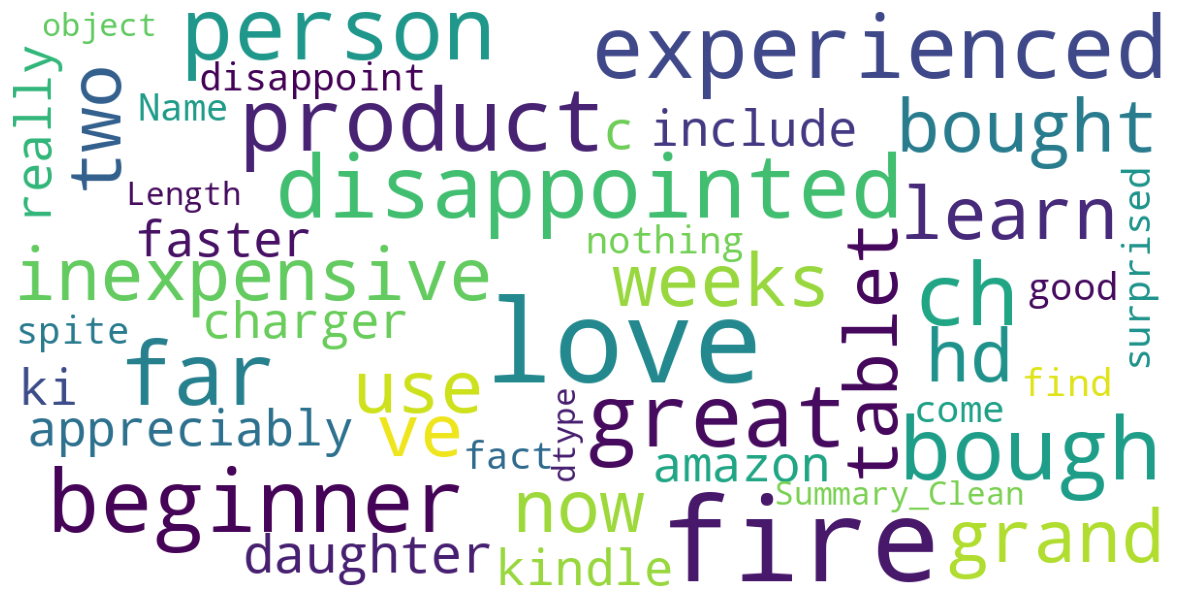

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)


mpl.rcParams['font.size']=12                #10
mpl.rcParams['savefig.dpi']=100             #72
mpl.rcParams['figure.subplot.bottom']=.1


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=300,
        max_font_size=40,
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads

    ).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(senti["Summary_Clean"])

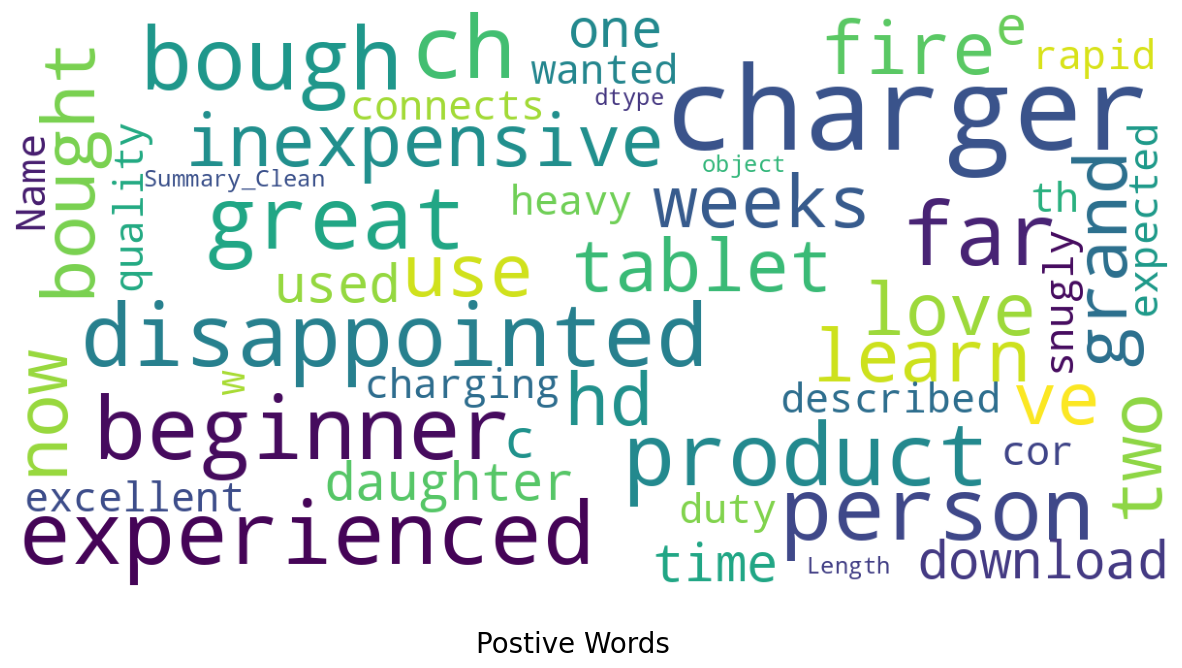

In [ ]:
show_wordcloud(senti["Summary_Clean"][senti.senti == "pos"] , title="Postive Words")

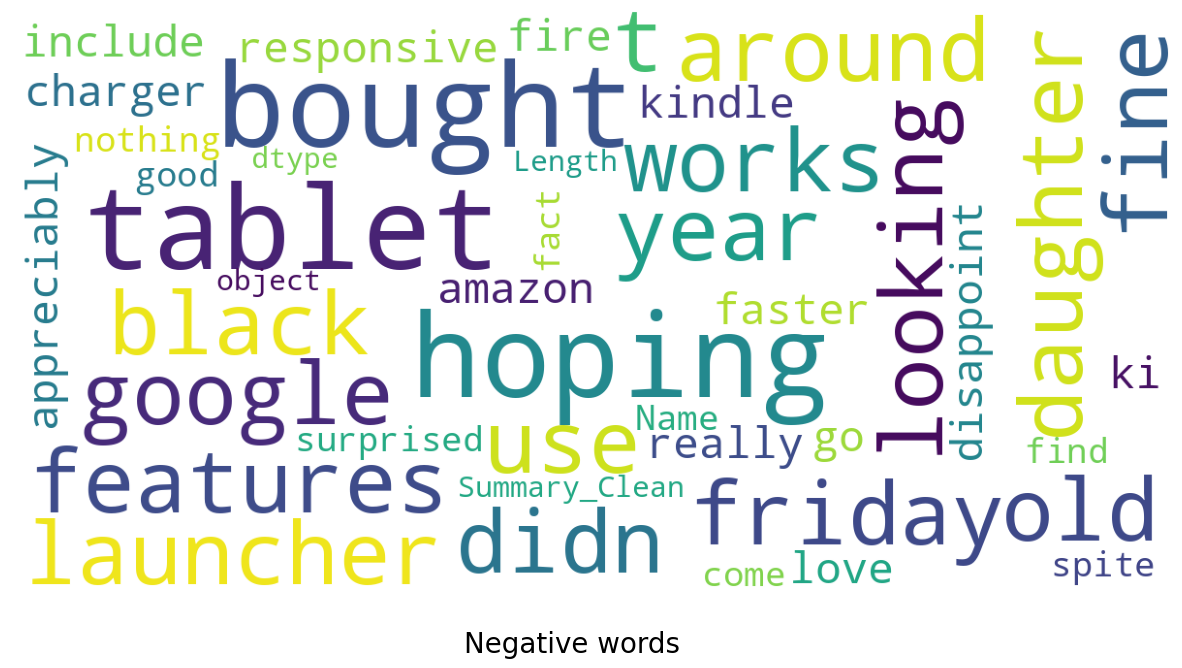

In [ ]:
show_wordcloud(senti["Summary_Clean"][senti.senti == "neg"] , title="Negative words")